In [141]:
import pandas as pd                                                 
import matplotlib.pyplot as plt                                      
import seaborn as sns                                            
import numpy as np                                                   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [46]:
pip install pip --upgrade --force-reinstall

  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Note: you may need to restart the kernel to use updated packages.


In [12]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [13]:
df_test.shape

(233, 7)

In [14]:
df_train.shape

(543, 8)

In [15]:
df_train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [16]:
df_test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [20]:
df_train

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
...,...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1,0
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1


In [21]:
df_train.corr()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
City,1.000000,0.012551,-0.024306,-0.049994,-0.051779,0.033183,0.004762,-0.087463
Location_Score,0.012551,1.000000,-0.358629,-0.205775,-0.264536,-0.042139,-0.074364,-0.423956
Internal_Audit_Score,-0.024306,-0.358629,1.000000,0.453839,0.365133,0.007685,0.112093,0.586097
External_Audit_Score,-0.049994,-0.205775,0.453839,1.000000,0.433374,-0.038786,0.141163,0.435619
Fin_Score,-0.051779,-0.264536,0.365133,0.433374,1.000000,-0.078573,0.138111,0.362463
Loss_score,0.033183,-0.042139,0.007685,-0.038786,-0.078573,1.000000,0.081858,0.044888
Past_Results,0.004762,-0.074364,0.112093,0.141163,0.138111,0.081858,1.000000,0.102120
IsUnderRisk,-0.087463,-0.423956,0.586097,0.435619,0.362463,0.044888,0.102120,1.000000


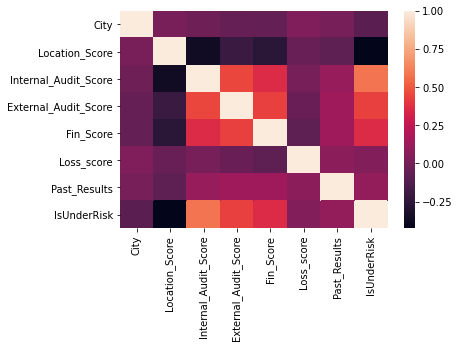

In [142]:
sns.heatmap(df_train.corr())

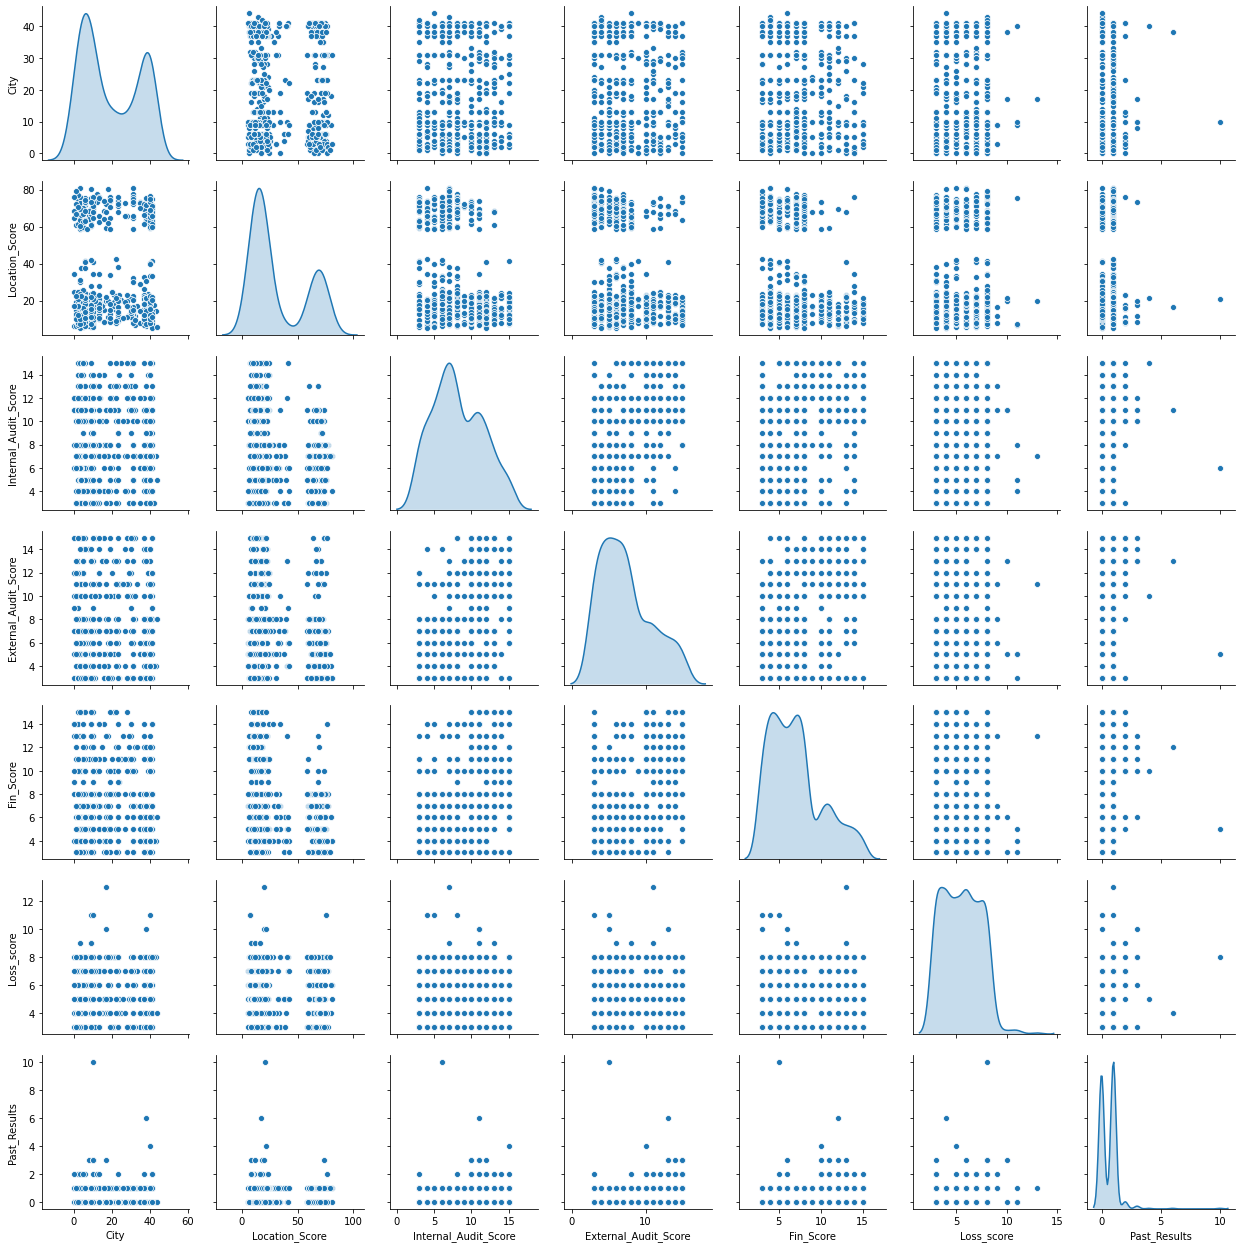

In [35]:
sns.pairplot(df_train.drop('IsUnderRisk',axis=1),diag_kind='kde')

Using H2O to find the best model

In [38]:
 import h2o

In [39]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from C:\Users\niran\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\niran\AppData\Local\Temp\tmpb8mz0n8d
  JVM stdout: C:\Users\niran\AppData\Local\Temp\tmpb8mz0n8d\h2o_niran_started_from_python.out
  JVM stderr: C:\Users\niran\AppData\Local\Temp\tmpb8mz0n8d\h2o_niran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_niran_u90zos
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.505 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [40]:
from h2o.automl import H2OAutoML

In [41]:
df = h2o.import_file('Train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
testing_df = h2o.import_file('Test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
df.describe()

Rows:543
Cols:8




,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
type,int,real,int,int,int,int,int,int
mins,0.0,5.185,3.0,3.0,3.0,3.0,0.0,0.0
mean,19.57642725598529,32.25934622467772,8.189686924493541,7.3278084714548815,7.046040515653774,5.530386740331486,0.6132596685082867,0.6261510128913443
maxs,44.0,80.809,15.0,15.0,15.0,13.0,10.0,1.0
sigma,14.722687406901029,24.887291329536744,3.3120216696421636,3.450667108100174,3.1569781510688233,1.839124119093846,0.7645085370985525,0.48427039429579793
zeros,8,0,0,0,0,0,250,203
missing,0,0,0,0,0,0,0,0
0,2.0,8.032,14.0,8.0,3.0,6.0,0.0,1.0
1,31.0,77.73,8.0,3.0,3.0,8.0,1.0,0.0
2,40.0,59.203,3.0,12.0,11.0,3.0,0.0,1.0


In [44]:
#Since this is classification problem, converting target as factor
df['IsUnderRisk'] = df['IsUnderRisk'].asfactor()

In [45]:
df['IsUnderRisk'].table()

IsUnderRisk,Count
0,203
1,340


In [46]:
df.describe()

Rows:543
Cols:8




,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
type,int,real,int,int,int,int,int,enum
mins,0.0,5.185,3.0,3.0,3.0,3.0,0.0,
mean,19.57642725598529,32.25934622467772,8.189686924493541,7.3278084714548815,7.046040515653774,5.530386740331486,0.6132596685082867,
maxs,44.0,80.809,15.0,15.0,15.0,13.0,10.0,
sigma,14.722687406901029,24.887291329536744,3.3120216696421636,3.450667108100174,3.1569781510688233,1.839124119093846,0.7645085370985525,
zeros,8,0,0,0,0,0,250,
missing,0,0,0,0,0,0,0,0
0,2.0,8.032,14.0,8.0,3.0,6.0,0.0,1
1,31.0,77.73,8.0,3.0,3.0,8.0,1.0,0
2,40.0,59.203,3.0,12.0,11.0,3.0,0.0,1


In [126]:
train,test,valid = df.split_frame(ratios=[.85,0.10],seed=11)

In [127]:
y = "IsUnderRisk"
x = df.columns
x.remove(y)


In [128]:
y

'IsUnderRisk'

In [134]:
aml = H2OAutoML(    nfolds=10,
    balance_classes=True,
    class_sampling_factors=None,
    max_after_balance_size=5.0,
    max_runtime_secs=None,
    max_runtime_secs_per_model=None,
    max_models=None,
    stopping_metric='AUTO',
    stopping_tolerance=None,
    stopping_rounds=None,
    seed=4,
    project_name=None,
    exclude_algos=['DeepLearning'],
    include_algos=None,
    exploitation_ratio=0,
    modeling_plan=None,
    monotone_constraints=None,
    algo_parameters=None,
    keep_cross_validation_predictions=True,
    keep_cross_validation_models=False,
    keep_cross_validation_fold_assignment=True,
    sort_metric='logloss',
    export_checkpoints_dir=None,
    verbosity='warn',
)

In [135]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
15:27:54.123: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
15:27:54.123: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [136]:
lb = aml.leaderboard
lb

model_id,logloss,auc,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20200518_152754_model_8,0.273228,0.944684,0.972429,0.114164,0.294122,0.0865078
GBM_1_AutoML_20200518_152754,0.286105,0.941301,0.971328,0.106741,0.300823,0.0904944
GBM_grid__1_AutoML_20200518_152754_model_2,0.288746,0.939925,0.970185,0.133681,0.303286,0.0919824
GBM_grid__1_AutoML_20200518_152754_model_14,0.29324,0.935993,0.96863,0.114763,0.305187,0.0931392
GBM_grid__1_AutoML_20200518_152754_model_3,0.29623,0.933629,0.967713,0.115362,0.306272,0.0938025
GBM_grid__1_AutoML_20200518_152754_model_4,0.296268,0.937221,0.968557,0.106861,0.307745,0.0947068
StackedEnsemble_BestOfFamily_AutoML_20200518_152754,0.296368,0.939156,0.970525,0.114164,0.303331,0.0920094
StackedEnsemble_AllModels_AutoML_20200518_152754,0.303219,0.9376,0.969896,0.122785,0.305185,0.0931381
GBM_grid__1_AutoML_20200518_152754_model_17,0.30434,0.932421,0.966949,0.12518,0.313264,0.0981344
GBM_grid__1_AutoML_20200518_152754_model_9,0.305041,0.938857,0.969137,0.109016,0.311429,0.0969882


We can see Gradient boosting machine performed well in reducing logloss

In [137]:
pred_df = aml.leader.predict(testing_df)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [140]:
aml.leader.confusion_matrix

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20200518_152754_model_8


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,57.0,57.0,7721.0,3.0,3.0,3.0,4.0,8.0,6.122807




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05409967703907445
RMSE: 0.23259337273248878
LogLoss: 0.2024404851580308
Mean Per-Class Error: 0.05724961553248753
AUC: 0.9828371299500192
AUCPR: 0.9864511728706904
Gini: 0.9656742599000383

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35919605611511823: 


,,0,1,Error,Rate
0,0,264.0,25.0,0.0865,(25.0/289.0)
1,1,10.0,278.0,0.0347,(10.0/288.0)
2,Total,274.0,303.0,0.0607,(35.0/577.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.359196,0.940778,248.0
1,max f2,0.359196,0.955326,248.0
2,max f0point5,0.684102,0.973926,209.0
3,max accuracy,0.603820,0.942808,217.0
4,max precision,0.997575,1.000000,0.0
5,max recall,0.128362,1.000000,355.0
6,max specificity,0.997575,1.000000,0.0
7,max absolute_mcc,0.603820,0.888428,217.0
8,max min_per_class_accuracy,0.496127,0.930796,235.0
9,max mean_per_class_accuracy,0.588094,0.942750,220.0



Gains/Lift Table: Avg response rate: 49.91 %, avg score: 54.79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010399,0.995310,2.003472,2.003472,1.000000,0.996398,1.000000,0.996398,0.020833,0.020833,100.347222,100.347222
1,,2,0.020797,0.993420,2.003472,2.003472,1.000000,0.994162,1.000000,0.995280,0.020833,0.041667,100.347222,100.347222
2,,3,0.031196,0.993229,2.003472,2.003472,1.000000,0.993294,1.000000,0.994618,0.020833,0.062500,100.347222,100.347222
3,,4,0.045061,0.992946,2.003472,2.003472,1.000000,0.993058,1.000000,0.994138,0.027778,0.090278,100.347222,100.347222
4,,5,0.050260,0.992590,2.003472,2.003472,1.000000,0.992754,1.000000,0.993995,0.010417,0.100694,100.347222,100.347222
5,,6,0.100520,0.990958,2.003472,2.003472,1.000000,0.991822,1.000000,0.992908,0.100694,0.201389,100.347222,100.347222
6,,7,0.150780,0.989491,2.003472,2.003472,1.000000,0.990305,1.000000,0.992041,0.100694,0.302083,100.347222,100.347222
7,,8,0.201040,0.987618,2.003472,2.003472,1.000000,0.988676,1.000000,0.991199,0.100694,0.402778,100.347222,100.347222
8,,9,0.299827,0.978455,2.003472,2.003472,1.000000,0.984128,1.000000,0.988870,0.197917,0.600694,100.347222,100.347222
9,,10,0.400347,0.813857,2.003472,2.003472,1.000000,0.931824,1.000000,0.974547,0.201389,0.802083,100.347222,100.347222




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.07636212669403694
RMSE: 0.2763369803230052
LogLoss: 0.24252917589879183
Mean Per-Class Error: 0.08823529411764708
AUC: 0.9632352941176471
AUCPR: 0.983585704346079
Gini: 0.9264705882352942

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4295998894908135: 


,,0,1,Error,Rate
0,0,7.0,1.0,0.125,(1.0/8.0)
1,1,1.0,16.0,0.0588,(1.0/17.0)
2,Total,8.0,17.0,0.08,(2.0/25.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.429600,0.941176,16.0
1,max f2,0.205967,0.965909,19.0
2,max f0point5,0.563967,0.958904,13.0
3,max accuracy,0.429600,0.920000,16.0
4,max precision,0.996216,1.000000,0.0
5,max recall,0.205967,1.000000,19.0
6,max specificity,0.996216,1.000000,0.0
7,max absolute_mcc,0.429600,0.816176,16.0
8,max min_per_class_accuracy,0.465317,0.875000,15.0
9,max mean_per_class_accuracy,0.563967,0.911765,13.0



Gains/Lift Table: Avg response rate: 68.00 %, avg score: 63.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.04,0.995177,1.470588,1.470588,1.000000,0.996216,1.000000,0.996216,0.058824,0.058824,47.058824,47.058824
1,,2,0.04,0.994139,0.000000,1.470588,0.000000,0.000000,1.000000,0.996216,0.000000,0.058824,-100.000000,47.058824
2,,3,0.04,0.993100,0.000000,1.470588,0.000000,0.000000,1.000000,0.996216,0.000000,0.058824,-100.000000,47.058824
3,,4,0.04,0.992061,0.000000,1.470588,0.000000,0.000000,1.000000,0.996216,0.000000,0.058824,-100.000000,47.058824
4,,5,0.08,0.991309,1.470588,1.470588,1.000000,0.991888,1.000000,0.994052,0.058824,0.117647,47.058824,47.058824
5,,6,0.12,0.986268,1.470588,1.470588,1.000000,0.988996,1.000000,0.992367,0.058824,0.176471,47.058824,47.058824
6,,7,0.16,0.981137,1.470588,1.470588,1.000000,0.982177,1.000000,0.989819,0.058824,0.235294,47.058824,47.058824
7,,8,0.20,0.979956,1.470588,1.470588,1.000000,0.980444,1.000000,0.987944,0.058824,0.294118,47.058824,47.058824
8,,9,0.32,0.971312,1.470588,1.470588,1.000000,0.976874,1.000000,0.983793,0.176471,0.470588,47.058824,47.058824
9,,10,0.40,0.956689,1.470588,1.470588,1.000000,0.967249,1.000000,0.980484,0.117647,0.588235,47.058824,47.058824




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.08650776484001016
RMSE: 0.2941220237248652
LogLoss: 0.27322760086380427
Mean Per-Class Error: 0.10237068965517238
AUC: 0.944683908045977
AUCPR: 0.9724290425921714
Gini: 0.889367816091954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4894744507515046: 


,,0,1,Error,Rate
0,0,153.0,21.0,0.1207,(21.0/174.0)
1,1,31.0,257.0,0.1076,(31.0/288.0)
2,Total,184.0,278.0,0.1126,(52.0/462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.489474,0.908127,220.0
1,max f2,0.196256,0.921053,308.0
2,max f0point5,0.747910,0.948845,176.0
3,max accuracy,0.539556,0.887446,214.0
4,max precision,0.998409,1.000000,0.0
5,max recall,0.070045,1.000000,392.0
6,max specificity,0.998409,1.000000,0.0
7,max absolute_mcc,0.712984,0.770928,182.0
8,max min_per_class_accuracy,0.511212,0.885057,217.0
9,max mean_per_class_accuracy,0.712984,0.897629,182.0



Gains/Lift Table: Avg response rate: 62.34 %, avg score: 63.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010823,0.996665,1.604167,1.604167,1.000000,0.997193,1.000000,0.997193,0.017361,0.017361,60.416667,60.416667
1,,2,0.021645,0.996043,1.604167,1.604167,1.000000,0.996243,1.000000,0.996718,0.017361,0.034722,60.416667,60.416667
2,,3,0.030303,0.995456,1.604167,1.604167,1.000000,0.995762,1.000000,0.996445,0.013889,0.048611,60.416667,60.416667
3,,4,0.041126,0.994885,1.604167,1.604167,1.000000,0.995098,1.000000,0.996090,0.017361,0.065972,60.416667,60.416667
4,,5,0.051948,0.994325,1.604167,1.604167,1.000000,0.994643,1.000000,0.995789,0.017361,0.083333,60.416667,60.416667
5,,6,0.101732,0.993148,1.604167,1.604167,1.000000,0.993638,1.000000,0.994736,0.079861,0.163194,60.416667,60.416667
6,,7,0.151515,0.991999,1.604167,1.604167,1.000000,0.992451,1.000000,0.993986,0.079861,0.243056,60.416667,60.416667
7,,8,0.201299,0.990727,1.604167,1.604167,1.000000,0.991357,1.000000,0.993335,0.079861,0.322917,60.416667,60.416667
8,,9,0.300866,0.984731,1.604167,1.604167,1.000000,0.988160,1.000000,0.991623,0.159722,0.482639,60.416667,60.416667
9,,10,0.400433,0.968771,1.604167,1.604167,1.000000,0.979653,1.000000,0.988647,0.159722,0.642361,60.416667,60.416667




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9091582,0.037846405,0.89361703,0.89361703,0.9130435,0.95652175,0.95652175,0.82608694,0.9130435,0.9130435,0.9347826,0.8913044
1,auc,0.9490777,0.026368229,0.95,0.9411765,0.94736844,0.97902095,0.99375,0.8968254,0.9479167,0.93560606,0.96344084,0.9356725
2,aucpr,0.9728198,0.017460583,0.97514373,0.9732472,0.97362715,0.9925447,0.9967534,0.9425119,0.97766507,0.9481482,0.98478395,0.96377254
3,err,0.090841815,0.037846405,0.10638298,0.10638298,0.08695652,0.04347826,0.04347826,0.17391305,0.08695652,0.08695652,0.06521739,0.10869565
4,err_count,4.2,1.7511901,5.0,5.0,4.0,2.0,2.0,8.0,4.0,4.0,3.0,5.0
5,f0point5,0.936653,0.042016745,0.96153843,0.9246575,0.9259259,0.9872612,0.9493671,0.8333333,0.9507042,0.9574468,0.9602649,0.9160305
6,f1,0.92409444,0.031948812,0.90909094,0.91525424,0.9259259,0.96875,0.9677419,0.8666667,0.9310345,0.9,0.9508197,0.9056604
7,f2,0.91328746,0.04084424,0.86206895,0.90604025,0.9259259,0.9509202,0.9868421,0.9027778,0.9121622,0.8490566,0.9415584,0.8955224
8,lift_top_group,1.6218984,0.19049643,1.5666667,1.5666667,1.7037038,1.3939394,1.5333333,1.6428572,1.5333333,2.090909,1.483871,1.7037038
9,logloss,0.27318785,0.07786334,0.2911743,0.2735675,0.2850713,0.15630236,0.16591774,0.41360745,0.2591859,0.35825554,0.2358886,0.29290783



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-18 15:28:05,3.234 sec,0.0,0.515204,0.724994,0.500000,0.499133,1.000000,0.500867,0.469900,0.633854,0.500000,0.680000,1.000000,0.32
1,,2020-05-18 15:28:05,3.237 sec,5.0,0.411792,0.514231,0.919268,0.942009,2.003472,0.119584,0.377229,0.454610,0.926471,0.969823,1.470588,0.16
2,,2020-05-18 15:28:05,3.241 sec,10.0,0.355954,0.410571,0.934478,0.953985,2.003472,0.097054,0.341621,0.380535,0.915441,0.964827,1.470588,0.16
3,,2020-05-18 15:28:05,3.244 sec,15.0,0.324600,0.352842,0.946217,0.961230,2.003472,0.091854,0.320610,0.336196,0.941176,0.973033,1.470588,0.12
4,,2020-05-18 15:28:05,3.248 sec,20.0,0.302636,0.314255,0.958309,0.969227,2.003472,0.091854,0.309987,0.313118,0.948529,0.977099,1.470588,0.08
5,,2020-05-18 15:28:05,3.251 sec,25.0,0.286289,0.285813,0.960562,0.970730,2.003472,0.084922,0.303158,0.294418,0.948529,0.977099,1.470588,0.08
6,,2020-05-18 15:28:05,3.255 sec,30.0,0.272416,0.262899,0.968654,0.976196,2.003472,0.077990,0.297965,0.281730,0.948529,0.977099,1.470588,0.08
7,,2020-05-18 15:28:05,3.259 sec,35.0,0.264653,0.249598,0.971015,0.977754,2.003472,0.077990,0.290045,0.267339,0.948529,0.977099,1.470588,0.08
8,,2020-05-18 15:28:05,3.263 sec,40.0,0.258142,0.238939,0.974012,0.980063,2.003472,0.067591,0.283816,0.256250,0.955882,0.979527,1.470588,0.08
9,,2020-05-18 15:28:05,3.267 sec,45.0,0.247310,0.223192,0.978596,0.983378,2.003472,0.060659,0.283850,0.253987,0.955882,0.979527,1.470588,0.08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Internal_Audit_Score,365.931274,1.000000,0.635384
1,Fin_Score,70.837288,0.193581,0.122998
2,External_Audit_Score,46.943100,0.128284,0.081510
3,City,42.315247,0.115637,0.073474
4,Location_Score,39.970921,0.109231,0.069403
5,Loss_score,9.906520,0.027072,0.017201
6,Past_Results,0.016807,0.000046,0.000029


<bound method H2OBinomialModel.confusion_matrix of >

In [138]:
pred_df

predict,p0,p1
1,0.013286,0.986714
1,0.0561939,0.943806
0,0.907593,0.0924075
1,0.010616,0.989384
1,0.213246,0.786754
0,0.783477,0.216523
0,0.920086,0.0799136
0,0.893444,0.106556
1,0.152804,0.847196
1,0.0111838,0.988816


In [78]:
h2o.export_file(pred_df, path ='C:\\Users\\niran\\Documents\\Python DSE-jan\\Machinehack\\3.Financial risk prediction\\Financial_Risk_Participants_Data\\Financial_Risk_Participants_Data\\auto_gbm_0.85_0.1_10fold_balancetrue_seed33_cap', force = True)



Export File progress: |███████████████████████████████████████████████████| 100%


In [ ]:
#The above prediction got me into top 3 in final leaderboard.